### opencv mser 기능을 활용한 text detection 연습

### 

In [ ]:
from os.path import exists
import os
import glob
from google.colab import files
import shutil
import cv2
import matplotlib.pyplot as plt
# from PIL import Image, ImageChops, ImageEnhance
import numpy as np

In [ ]:
os.makedirs('result', exist_ok=True)
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join('', filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving 계좌번호-samsung-3.jpg to 계좌번호-samsung-3.jpg
move 계좌번호-samsung-3.jpg to 계좌번호-samsung-3.jpg


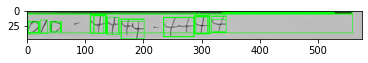

In [ ]:
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(gray)

clone = img.copy()
for region in regions:
    # fit a bounding box to the contour
    (x, y, w, h) = cv2.boundingRect(region.reshape(-1,1,2))
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 1)

plt.imshow(clone)

In [ ]:
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5, 5),0)

mser = cv2.MSER_create()
regions,_ = mser.detectRegions(gray)

clone = img.copy()


hulls = [cv2.boundingRect(cv2.convexHull(p.reshape(-1, 1, 2))) for p in regions]
hulls = [x for x in hulls if x[3] > x[2]]
# print(hulls[3][2], hulls[3][3])
remove1 = set()
for i,c1 in enumerate(hulls):

    x, y, w, h = c1
    r1_start = (x, y)
    r1_end = (x+w, y+h)

    for j,c2 in enumerate(hulls):
        
        if i == j:
            continue

        x, y, w, h = c2
        r2_start = (x, y)
        r2_end = (x+w, y+h)

        if r1_start[0]> r2_start[0] and r1_start[1] > r2_start[1] and r1_end[0] < r2_end[0] and r1_end[1] < r2_end[1]:
            remove1.add(i)


for j,cnt in enumerate(hulls):
    if j in remove1: continue
    x, y, w, h = cnt
    margin = 0
    cv2.rectangle(clone, (x-margin, y-margin), (x + w + margin, y + h + margin), (0, 255, 0), 1)

plt.imshow(clone)

error: ignored

In [ ]:
img.shape

(160, 448, 3)

In [ ]:
file_list = os.listdir('/content/drive/MyDrive/final_project/colab/text_detection_raw')
save_path = '/content/drive/MyDrive/final_project/colab/result_detection'

In [ ]:
for filename in file_list:
  img = cv2.imread(f'/content/drive/MyDrive/playdata/result_image/{filename}')
  margin = (img.shape[0] // 10, img.shape[1]//10)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(5, 5),0)

  mser = cv2.MSER_create()
  regions,_ = mser.detectRegions(gray)

  clone = img.copy()


  hulls = [cv2.boundingRect(cv2.convexHull(p.reshape(-1, 1, 2))) for p in regions]
  hulls = [x for x in hulls if x[3] / x[2] > 0.4]
  # print(hulls[3][2], hulls[3][3])
  remove1 = set()
  for i,c1 in enumerate(hulls):

      x, y, w, h = c1
      r1_start = (x, y)
      r1_end = (x+w, y+h)

      for j,c2 in enumerate(hulls):
          
          if i == j:
              continue

          x, y, w, h = c2
          r2_start = (x, y)
          r2_end = (x+w, y+h)

          if r1_start[0]> r2_start[0] and r1_start[1] > r2_start[1] and r1_end[0] < r2_end[0] and r1_end[1] < r2_end[1]:
              remove1.add(i)


  for i,c1 in enumerate(hulls):
      if i in remove1: continue
      x, y, w, h = c1

      for j,c2 in enumerate(hulls):
          
          if i == j or j in remove1:
              continue
          x2, y2, w2, h2 = c2

          if min(x+w, x2+w2) - max(x, x2) + margin[0] >= 0 and min(y+h, y2+h2) - max(y, y2) +margin[1] >= 0:
            hulls[i] = (min(x, x2), min(y, y2), max(x+w, x2+w2)-min(x, x2), max(y+h, y2+h2)-min(y, y2))
            hulls[j] = (min(x, x2), min(y, y2), max(x+w, x2+w2)-min(x, x2), max(y+h, y2+h2)-min(y, y2))

  for j, c in enumerate(hulls):
      if j in remove1: continue
      x, y, w, h = c
      margin = 0
      cv2.rectangle(clone, (x-margin, y-margin), (x + w + margin, y + h + margin), (0, 255, 0), 1)
  cv2.imwrite(f'{save_path}/{filename}', clone)


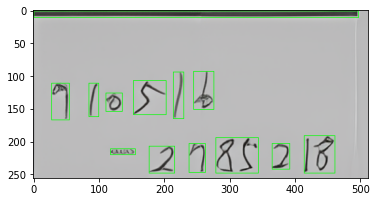

In [ ]:
# same = []
# for i,c1 in enumerate(hulls):
#     temp = {i}
#     x, y, w, h = cv2.boundingRect(c1)
#     print(x,y,w,h)
#     for j,c2 in enumerate(hulls):
#         if i == j:
#             continue

#         x2, y2, w2, h2 = cv2.boundingRect(c2)

#         if min(x+w, x2+w2) - max(x, x2) >= 0 and min(y+h, y2+h2) - max(y, y2) >= 0:
#           temp.add(j)
#     same.append(temp)
# while True:
#   for s in same:

# for j,cnt in enumerate(hulls):
#     if j in remove1: continue
#     x, y, w, h = cv2.boundingRect(cnt)
#     margin = 0
#     cv2.rectangle(clone, (x-margin, y-margin), (x + w + margin, y + h + margin), (0, 255, 0), 1)
# plt.imshow(clone)

In [ ]:
def calc_sim(text, obj):
    # text: ymin, xmin, ymax, xmax
    # obj: ymin, xmin, ymax, xmax
    text_ymin, text_xmin, text_ymax, text_xmax = text
    obj_ymin, obj_xmin, obj_ymax, obj_xmax = obj

    x_dist = min(abs(text_xmin-obj_xmin), abs(text_xmin-obj_xmax), abs(text_xmax-obj_xmin), abs(text_xmax-obj_xmax))
    y_dist = min(abs(text_ymin-obj_ymin), abs(text_ymin-obj_ymax), abs(text_ymax-obj_ymin), abs(text_ymax-obj_ymax))

    dist = x_dist + y_dist
    return dist

In [ ]:
hulls

In [ ]:
coordinates, bboxes = mser.detectRegions(img)
for bbox in [cv2.convexHull(p.reshape(-1, 1, 2)) for p in coordinates]:
    x, y, w, h = cv2.boundingRect(bbox[1])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
bboxes_list = sorted(bboxes, key=lambda x: (x[0], x[1]))  # Sort the bounding boxes based on y1 coordinate ( y of the left-top coordinate )
print(bboxes_list)
# combined_bboxes = grouper(bboxes_list, median_height)  # Group the bounding boxes
# for group in combined_bboxes:
#     x_min = min(group, key=lambda k: k[0])[0]  # Find min of x1
#     x_max = max(group, key=lambda k: k[2])[2]  # Find max of x2
#     y_min = min(group, key=lambda k: k[1])[1]  # Find min of y1
#     y_max = max(group, key=lambda k: k[3])[3]  # Find max of y2
#     cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

In [ ]:
file_list = os.listdir('/content/drive/MyDrive/final_project/colab/text_detection_2x')
save_path = '/content/drive/MyDrive/final_project/colab/result_detection'

for filename in file_list:
  img = cv2.imread(f'/content/drive/MyDrive/final_project/colab/text_detection_2x/{filename}')
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(3, 3),0)

  mser = cv2.MSER_create()
  regions,_ = mser.detectRegions(gray)
  hulls = [cv2.boundingRect(x.reshape(-1,1,2)) for x in regions]
  # hulls = [x for x in hulls if x[2] < img.shape[1] * 0.5]
  clone = img.copy()
  for hull in hulls:
    # fit a bounding box to the contour
    (x, y, w, h) = hull
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 1)
  plt.figure(figsize=(10,10))
  plt.imshow(clone)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.